In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from jupyter_datatables import init_datatables_mode
sns.set()

In [4]:
data = pd.read_csv("SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.describe(include= "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


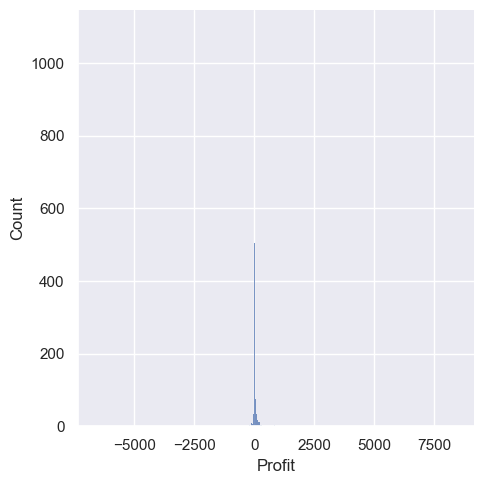

In [8]:
sns.displot(data["Profit"])

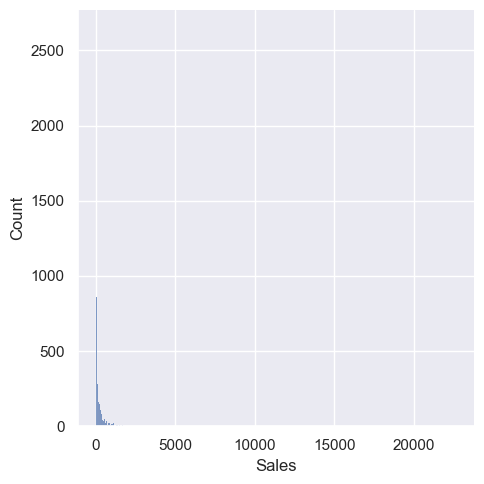

In [9]:
sns.displot(data["Sales"])

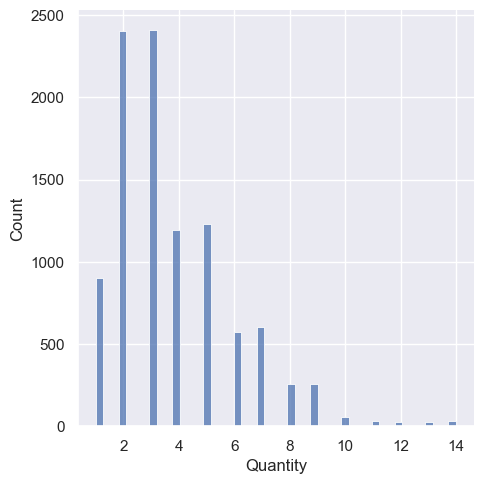

In [10]:
sns.displot(data["Quantity"])

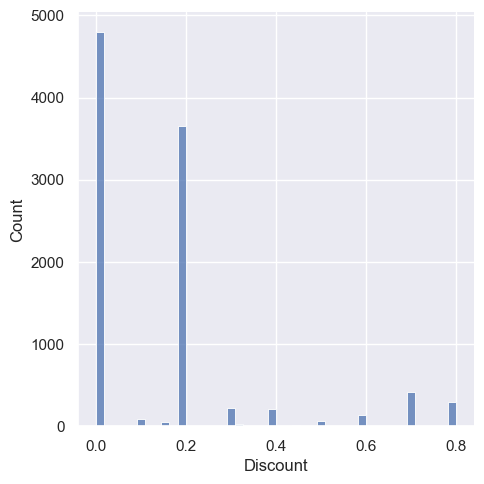

In [11]:
sns.displot(data["Discount"])

Text(0.5, 1.0, 'Discount and Profit')

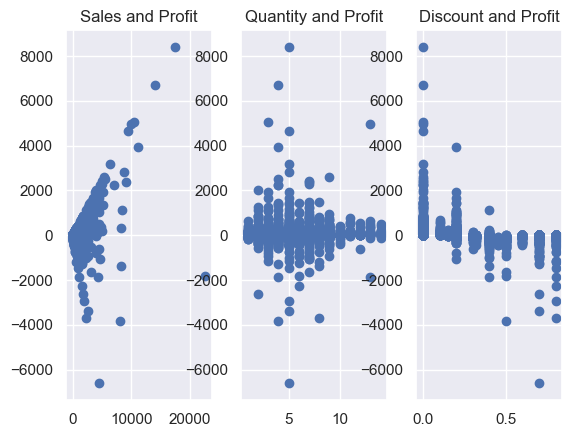

In [12]:
plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Sales'], data['Profit'])
plt.title("Sales and Profit")

plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Quantity'], data['Profit'])
plt.title("Quantity and Profit")

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Discount'], data['Profit'])
plt.title("Discount and Profit")

In [13]:
columntocheck = data[['Sales', 'Quantity', 'Discount']]
newdf = pd.DataFrame()

newdf["VIF"] = [variance_inflation_factor(columntocheck.values, x) for x in range(columntocheck.shape[1])]
newdf.rename(index={0:'Sales', 1:'Quantity', 2:'Discount'}, inplace=True)
newdf

,VIF
Sales,1.184199
Quantity,1.574475
Discount,1.378901


In [14]:
datanew = pd.get_dummies(data, drop_first=True)
datanew.head()

,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.9136,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,42420,731.9400,3,0.00,219.5820,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,90036,14.6200,2,0.00,6.8714,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,33311,957.5775,5,0.45,-383.0310,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,33311,22.3680,2,0.20,2.5164,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
depend = datanew['Profit']
indep = datanew.drop(axis =1, columns = ['Profit'])

In [16]:
scaler = StandardScaler()
scaler.fit(indep)
scaled_indep = scaler.transform(indep)
scaled_indep

array([[-0.39830154,  0.0515104 , -0.8043034 , ..., -0.30410398,
        -0.13921151, -0.18158077],
       [-0.39830154,  0.80563348, -0.35486486, ..., -0.30410398,
        -0.13921151, -0.18158077],
       [ 1.08681691, -0.34536777, -0.8043034 , ..., -0.30410398,
        -0.13921151, -0.18158077],
       ...,
       [ 1.16762886,  0.04608048, -0.8043034 , ..., -0.30410398,
        -0.13921151, -0.18158077],
       [ 1.16762886, -0.32133108,  0.09457367, ..., -0.30410398,
        -0.13921151, -0.18158077],
       [ 1.16937547,  0.02134419, -0.8043034 , ..., -0.30410398,
        -0.13921151, -0.18158077]])

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_indep, depend, test_size = 0.2, random_state = 42)

In [18]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

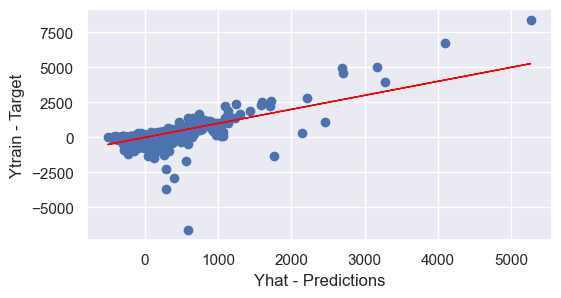

In [19]:
yhat = reg.predict(xtrain)
plt.rcParams["figure.figsize"] = (6,3)
plt.scatter(yhat, ytrain)
plt.xlabel("Yhat - Predictions")
plt.ylabel("Ytrain - Target")
plt.plot(yhat, yhat, color = 'red', linewidth = 1)
plt.show()

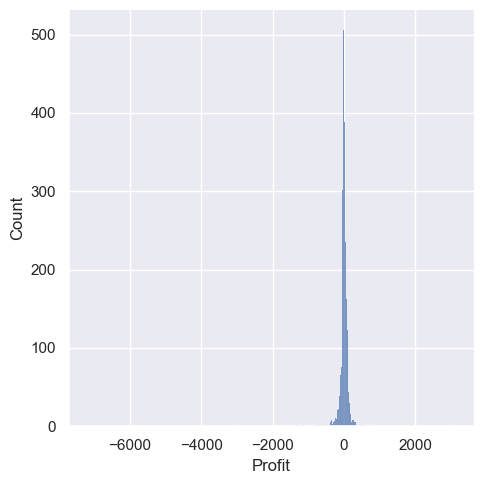

In [20]:
sns.displot(ytrain-yhat)

In [21]:
reg.score(xtrain,ytrain)

0.47615966824080447

In [22]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [23]:
data["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

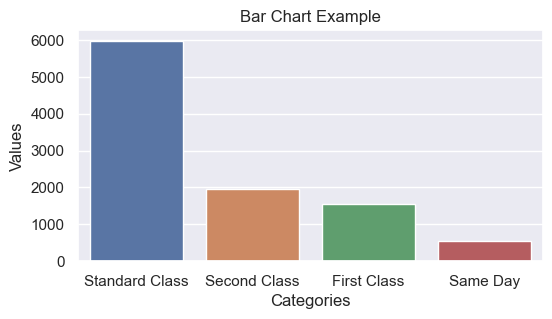

In [24]:
x_data = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
y_data = [5968, 1945, 1538, 543]

sns.barplot(x=x_data, y=y_data)

plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

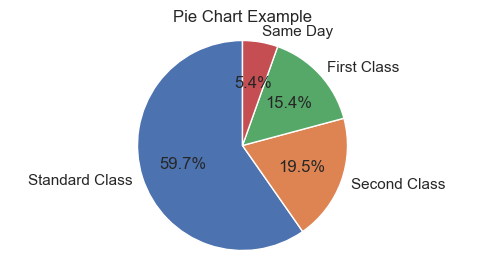

In [25]:
plt.pie(y_data, labels=x_data, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart Example')
plt.axis('equal')
plt.show()

In [27]:
categorical_vars = data.select_dtypes(include='object').columns

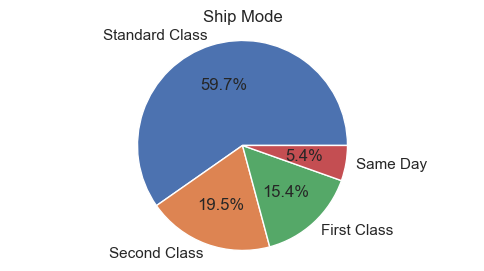

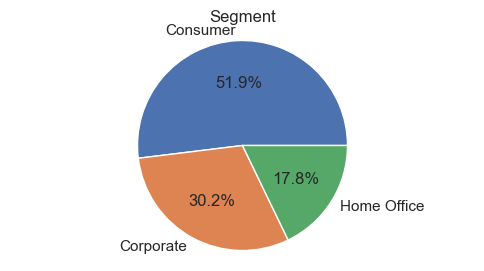

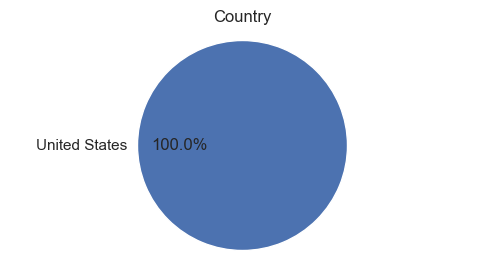

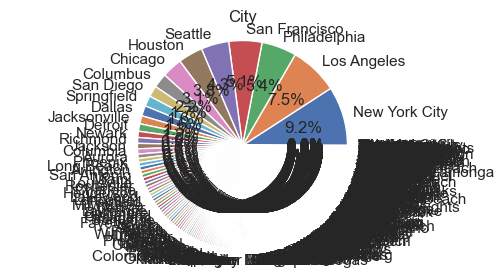

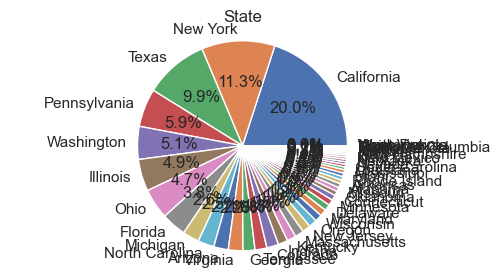

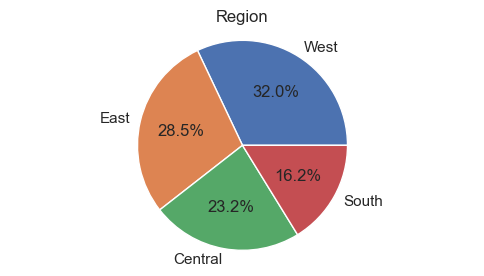

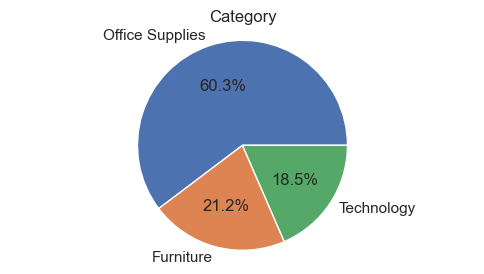

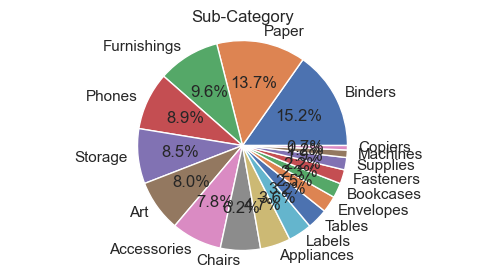

In [28]:
for var in categorical_vars:
    counts = data[var].value_counts()
    plt.figure()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')  
    plt.show()

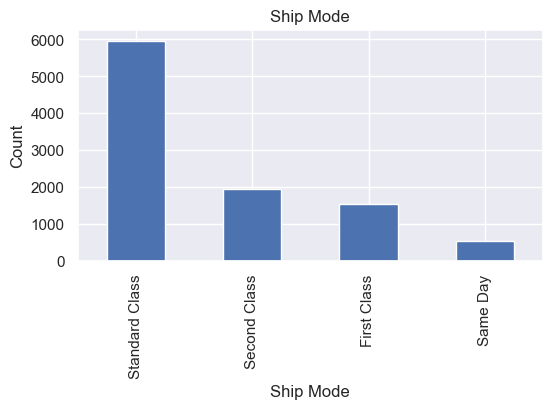

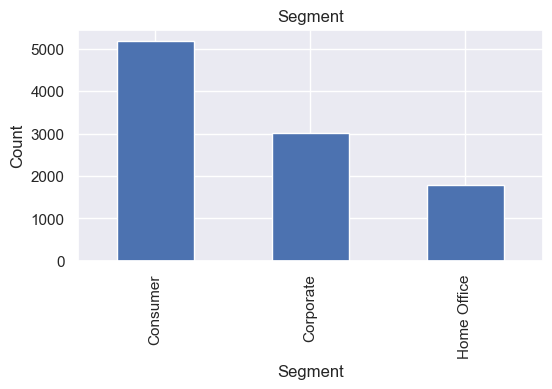

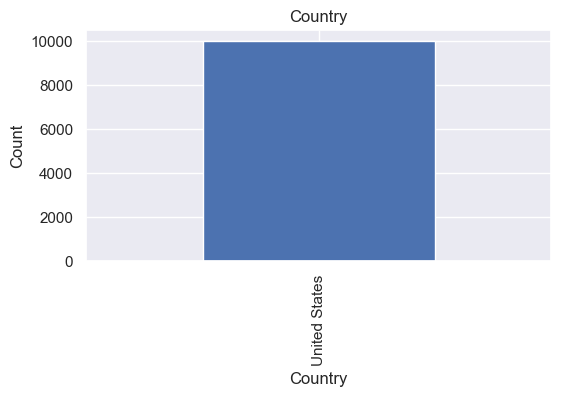

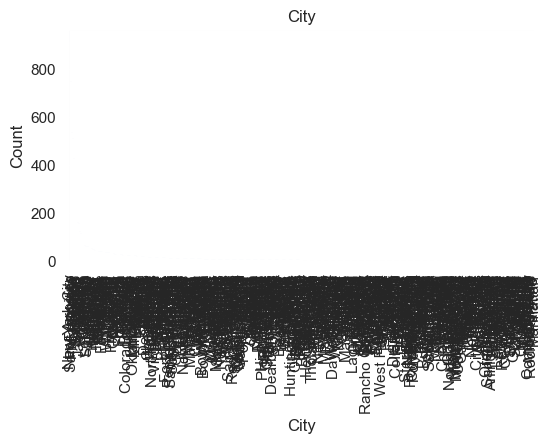

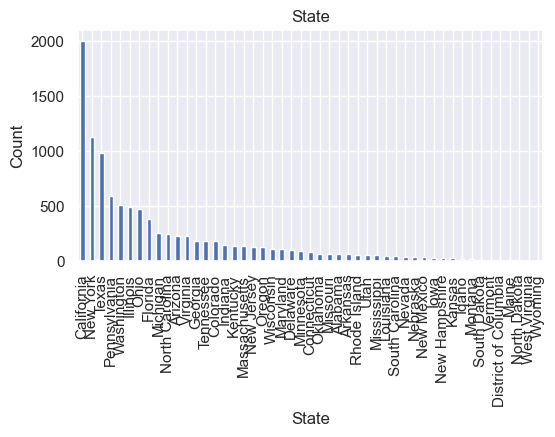

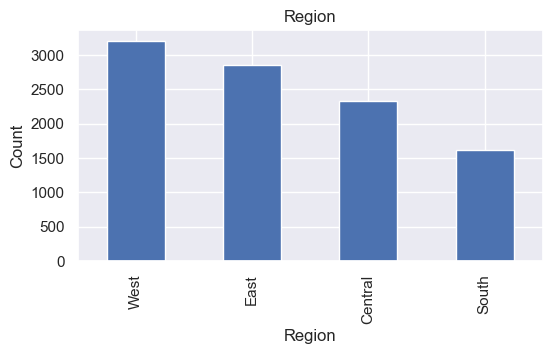

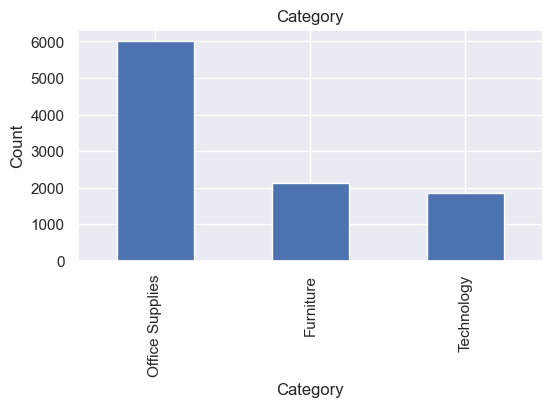

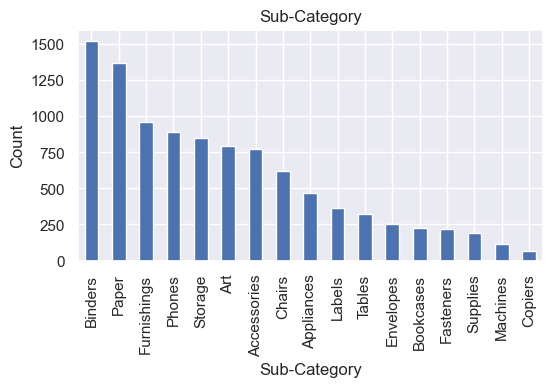

In [30]:
for var in categorical_vars:
    counts = data[var].value_counts()
    plt.figure()
    counts.plot(kind='bar')
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()